# Assignment 1
### Ben Gruher

For this exercise you will pull together data from threedifferent sources, and use that data to do some analysis about the relationships between businesses, the kind of business, where the business is located, and the population and income of where it is located. 

Import Pandas library

In [1]:
import pandas as pd

Read businesses.tsv with special delimiter and assign column names

In [2]:
col_names = ['UUID', 'Code', 'zip']
types = {'UUID':str, 'zip':str}
businesses = pd.read_csv('businesses.tsv', delimiter = '	', header = None, names = col_names, dtype = types)

In [3]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935626 entries, 0 to 935625
Data columns (total 3 columns):
UUID    935626 non-null object
Code    846679 non-null float64
zip     935626 non-null object
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [4]:
businesses.head(10)

,UUID,Code,zip
0,f8e86d9a-d9ed-47c2-88e1-b390fe6b109a,54111.0,75426
1,09c31a00-d56e-44f0-971d-a83ed564bdd6,561720.0,24202
2,a42adbd7-0708-41e0-8e34-276c3184e69f,54111.0,90012
3,43b94f79-00f1-43ed-af63-316fc34329b4,NaN,04915
4,0bf5da35-890f-42e0-875f-5cb41d5013dc,NaN,78132
5,d695bb51-c83b-4ca3-9139-7a541393fd8e,6211.0,75390
6,6b27f480-a8f4-4fc8-9da4-a1af353a1a01,522110.0,20110
7,80bd6a28-5123-4eb2-9bfa-db8ae7e23de1,54111.0,91910
8,c1de2642-7c2e-441f-8b0e-8b21fc45b557,54111.0,94043
9,b511581a-5355-4304-bb64-c4abd042fa7e,54111.0,95833


Fill in NaN's in Code column with 99 (unknown) in order to change from float to int

In [5]:
businesses.fillna(99, inplace = True)

In [6]:
businesses.head()

,UUID,Code,zip
0,f8e86d9a-d9ed-47c2-88e1-b390fe6b109a,54111.0,75426
1,09c31a00-d56e-44f0-971d-a83ed564bdd6,561720.0,24202
2,a42adbd7-0708-41e0-8e34-276c3184e69f,54111.0,90012
3,43b94f79-00f1-43ed-af63-316fc34329b4,99.0,04915
4,0bf5da35-890f-42e0-875f-5cb41d5013dc,99.0,78132


Now, change float to int for Code column.

In [7]:
businesses = businesses.astype({'Code':int})

Function for taking first two digits of a number

In [8]:
import math

def first_two(d):                
     return (d // 10 ** (int(math.log(d, 10)) - 1))

Extract first two digits of Code column

In [9]:
businesses.Code = businesses.Code.apply(lambda x: first_two(x))

In [10]:
businesses.head()

,UUID,Code,zip
0,f8e86d9a-d9ed-47c2-88e1-b390fe6b109a,54,75426
1,09c31a00-d56e-44f0-971d-a83ed564bdd6,56,24202
2,a42adbd7-0708-41e0-8e34-276c3184e69f,54,90012
3,43b94f79-00f1-43ed-af63-316fc34329b4,99,04915
4,0bf5da35-890f-42e0-875f-5cb41d5013dc,99,78132


Read naics_codes.txt

In [11]:
naics = pd.read_csv('naics_codes.txt', delimiter = '	', header = 0)

In [12]:
naics.head(25)

,Code,Title,Abbreviation
0,11,"Agriculture, Forestry, Fishing and Hunting",Agriculture
1,21,"Mining, Quarrying, and Oil and Gas Extraction",Oil&Gas
2,22,Utilities,Utilities
3,23,Construction,Construction
4,31,Manufacturing,Manufacturing
5,32,Manufacturing,Manufacturing
6,33,Manufacturing,Manufacturing
7,42,Wholesale Trade,Wholesale
8,44,Retail Trade,Retail
9,45,Retail Trade,Retail


Read zip_demographics.txt with special delimiter and header row using zip as index

In [13]:
types = {'zip':str}
zips = pd.read_csv('zip_demographics.txt', delimiter = '	', header = 0, dtype = types)

In [14]:
zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32627 entries, 0 to 32626
Data columns (total 5 columns):
zip              32627 non-null object
state            32627 non-null object
mean_income      32627 non-null int64
median_income    32627 non-null int64
population       32627 non-null int64
dtypes: int64(3), object(2)
memory usage: 1019.7+ KB


In [15]:
zips.head()

,zip,state,mean_income,median_income,population
0,01001,MA,56663,66688,16445
1,01002,MA,49853,75063,28069
2,01003,MA,28462,35121,8491
3,01005,MA,75423,82442,4798
4,01007,MA,79076,85802,12962


I also wanted to make sure that the income columns had values that made sense. For example, a negative median income would show some sort of mistake in the dataset. On the other hand, a ridiculously high income might also be suspect.

The below values seem reasonable. The minimum for mean income and median income are very low but this seems valid because there are zip codes that have only a few people and a majority of those people may not have an income at all. 

In [16]:
zips.mean_income.max()

223106

In [17]:
zips.mean_income.min()

33

In [18]:
zips.median_income.max()

361842

In [19]:
zips.median_income.min()

54

In [20]:
zips.population.min()

1

Merge businesses DF with NAICS DF. First, need to name column in businesses to 'Code' (see above). Then, need to extract the first two digits off the NAICS code.

In [21]:
bCodes = pd.merge(businesses, naics, on = 'Code', how = 'left')

In [22]:
bCodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935626 entries, 0 to 935625
Data columns (total 5 columns):
UUID            935626 non-null object
Code            935626 non-null int64
zip             935626 non-null object
Title           935626 non-null object
Abbreviation    935626 non-null object
dtypes: int64(1), object(4)
memory usage: 28.6+ MB


In [23]:
bCodes.head()

,UUID,Code,zip,Title,Abbreviation
0,f8e86d9a-d9ed-47c2-88e1-b390fe6b109a,54,75426,"Professional, Scientific, and Technical Services",Tech Services
1,09c31a00-d56e-44f0-971d-a83ed564bdd6,56,24202,Administrative and Support and Waste Managemen...,Administrative
2,a42adbd7-0708-41e0-8e34-276c3184e69f,54,90012,"Professional, Scientific, and Technical Services",Tech Services
3,43b94f79-00f1-43ed-af63-316fc34329b4,99,04915,Unknown,Unknown
4,0bf5da35-890f-42e0-875f-5cb41d5013dc,99,78132,Unknown,Unknown


We must also check that the businesses all have valid NAICS codes. 

Since we did a left outer join on businesses and NAICS, a business with an invalid NAICS code would have a null title. Since we don't have this, we know that all the given codes are valid.

In [24]:
sum(pd.isnull(bCodes.Title))

0

Merge bCodes with zip code dataset

In [25]:
bCodeZip = pd.merge(bCodes, zips, on = 'zip', how = 'left')

In [26]:
bCodeZip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935626 entries, 0 to 935625
Data columns (total 9 columns):
UUID             935626 non-null object
Code             935626 non-null int64
zip              935626 non-null object
Title            935626 non-null object
Abbreviation     935626 non-null object
state            922769 non-null object
mean_income      922769 non-null float64
median_income    922769 non-null float64
population       922769 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 53.5+ MB


In [27]:
bCodeZip.head()

,UUID,Code,zip,Title,Abbreviation,state,mean_income,median_income,population
0,f8e86d9a-d9ed-47c2-88e1-b390fe6b109a,54,75426,"Professional, Scientific, and Technical Services",Tech Services,TX,33016.0,40449.0,5301.0
1,09c31a00-d56e-44f0-971d-a83ed564bdd6,56,24202,Administrative and Support and Waste Managemen...,Administrative,VA,43632.0,61127.0,12905.0
2,a42adbd7-0708-41e0-8e34-276c3184e69f,54,90012,"Professional, Scientific, and Technical Services",Tech Services,CA,39775.0,45188.0,27522.0
3,43b94f79-00f1-43ed-af63-316fc34329b4,99,04915,Unknown,Unknown,ME,39499.0,50227.0,8468.0
4,0bf5da35-890f-42e0-875f-5cb41d5013dc,99,78132,Unknown,Unknown,TX,84926.0,103939.0,19139.0


Check to see if there are any null values in the state column. Since we used a left outer join, a null state value would mean that that particular entry had an invalid zip code.

In [28]:
sum(pd.isnull(bCodeZip.state))

12857

We had 12,857 entries with invalid zip codes. Some had letters in them and other just did not match with our zip dataset.

In [29]:
bCodeZip[bCodeZip.isna().any(axis=1)]

,UUID,Code,zip,Title,Abbreviation,state,mean_income,median_income,population
5,d695bb51-c83b-4ca3-9139-7a541393fd8e,62,75390,Health Care and Social Assistance,Health Care,NaN,NaN,NaN,NaN
22,aa2e00cb-ed5b-4994-869f-55d8010de094,62,R3T 2H4,Health Care and Social Assistance,Health Care,NaN,NaN,NaN,NaN
45,79f026de-1503-45a0-bf62-8fa948a35fd9,99,05402,Unknown,Unknown,NaN,NaN,NaN,NaN
66,a4e93ced-80ba-4163-8913-66c6660d5cc4,54,95741,"Professional, Scientific, and Technical Services",Tech Services,NaN,NaN,NaN,NaN
100,56f332e2-4e3b-4e94-9dfd-2d8e0d073431,54,V1J 3X6,"Professional, Scientific, and Technical Services",Tech Services,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
935417,77415448-6ad6-4420-a973-455c31c766c2,32,15275,Manufacturing,Manufacturing,NaN,NaN,NaN,NaN
935474,d01b19de-7007-4bf0-9390-7dffcf03ffb5,61,00714,Educational Services,Education,NaN,NaN,NaN,NaN
935512,fff1199a-50b8-4f4a-9ef5-5d9cffdf6a60,62,00921,Health Care and Social Assistance,Health Care,NaN,NaN,NaN,NaN
935583,c8e2383e-2058-43cd-920e-7c6c281f9d36,56,10119,Administrative and Support and Waste Managemen...,Administrative,NaN,NaN,NaN,NaN


# 1.
What kind of data cleaning and error checking did you do in processing the files, what challenges did you find, and what did you do about those challenges? What assumptions did you make about the data attributes?  Please address these issues in some detail.  

Answer:

In order to merge the business data set with the NAICS code data set, the code columns must be in the same format and of the same datatype. For the business data set, the code came as a large number with multiple null values. Pandas cannot assign a column the datatype of integer if there are null values so I had to first decide what to do with those values. I chose to replace each null code with 99 (unknown). I then made the codes in the business data set integer datatypes. 

Since I wanted to join the two data sets using the code column, I had to simplify the NAICS code to the first two digits in the business data set. 

The next step was to check if any businesses in the businesses data set had any invalid NAICS codes. To do this, I checked if there were any null values in the title. Since I did a left outer join, if there were any businesses with NAICS codes that didn't match any entries in the NAICS dataset, they would be included with nulls for the title. There were no nulls in the title column after the join so I know that all the NAICS codes were valid.

In order to merge that data frame with the zip dataset, I had to convert the zip into a string, since it was originally interpretted as an int. This prevented Pandas from removing the leading zero from the zip code. I then did a left outer join to include all items in bCodes (businesses merged with NAICS) and only matched items from the zip code dataset. 

I then checked if there were any invalid zip codes by seeing if any entries had a null state value. Since I did a left outer join, a null state value would mean that there was no match for that zip code in the zip demographic dataset. I found 12,857 entries with invalid zip codes. After inspection, it looked like some of them had letters in them and the others I could not find a match when searching the zip_demographics.txt file. I decided that these were still most likely valid businesses, so for business questions that did not involve the business' location, I would leave them in the dataset. However, if a business question wants to factor in the location of the business, I would remove them from the dataset.   

# 2. 
Considering only the top-level NAICS categories, produce a graphic of your choiceshowing the number of businesses per category and also showing the percentage of businesses in each category.

Answer:

I chose to use a horizontal bar graph to display the number of businesses in each category. This made it easier to read the labels than a vertical bar graph. I also chose to group them by Abbreviation instead of NAICS code so that the redundant categories would be aggregated together.

Text(0, 0.5, 'Business Type')

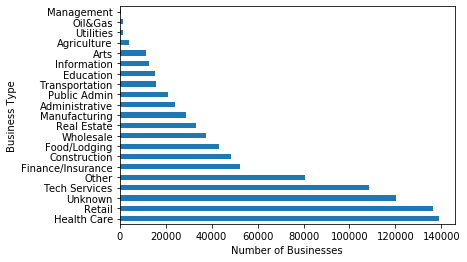

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
ax = bCodeZip.Abbreviation.value_counts().plot(kind='barh')
ax.set_xlabel('Number of Businesses')
ax.set_ylabel('Business Type')

I included a horizontal bar graph to show the percentages of businesses in each category for the same reasons. This way, the business type is more legible and it shows the same general distribution as the other graph.

Text(0, 0.5, 'Business Type')

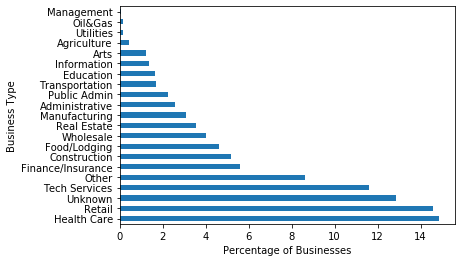

In [31]:
# busTypePerc = bCodeZip.Abbreviation.value_counts(normalize=True).apply(lambda n: "{:.2}".format(n))
busTypePerc = bCodeZip.Abbreviation.value_counts(normalize=True) * 100
ax = busTypePerc.plot(kind='barh')
ax.set_xlabel('Percentage of Businesses')
ax.set_ylabel('Business Type')

I think a more effective and intuitive way to display the percentages is with a pie chart. 

([<matplotlib.patches.Wedge at 0xb04cc30>,
 [Text(3.9303328686040273, 1.9779998842191175, 'Health Care'),
  Text(0.7904996588118894, 4.328407361769256, 'Retail'),
  Text(-2.7677704146251, 3.420445428877064, 'Unknown'),
  Text(-4.366687040625462, 0.540411222342441, 'Tech Services'),
  Text(-3.837697900751423, -2.1522255510443418, 'Other'),
  Text(-2.534479619093894, -3.596722544261327, 'Finance/Insurance'),
  Text(-1.196138564428274, -4.23429480960968, 'Construction'),
  Text(0.1461935197155832, -4.3975706310181275, 'Food/Lodging'),
  Text(1.3210265416125535, -4.197009515876177, 'Wholesale'),
  Text(2.2684532455650164, -3.7701617833569885, 'Real Estate'),
  Text(2.9984847654457347, -3.2201070030963006, 'Manufacturing'),
  Text(3.523321278153254, -2.6355658160843802, 'Administrative'),
  Text(3.879789628411567, -2.075387298619233, 'Public Admin'),
  Text(4.1045821320767715, -1.5850569456761199, 'Transportation'),
  Text(4.247816841829784, -1.147193130326034, 'Education'),
  Text(4.337401

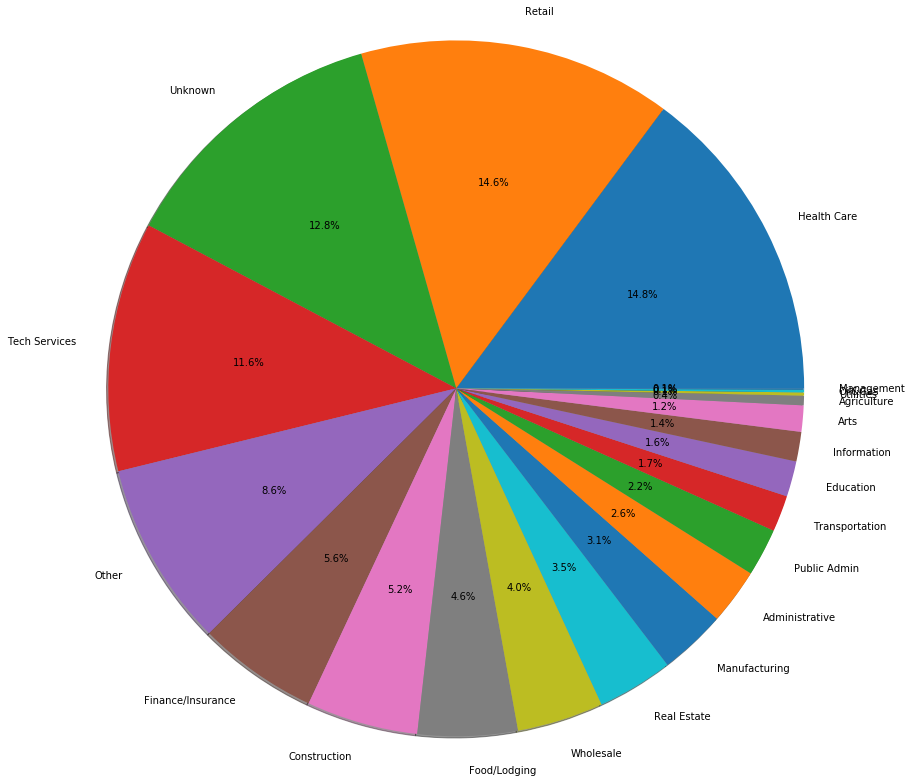

In [32]:
plt.pie(busTypePerc, labels=busTypePerc.index, shadow=True, autopct='%1.1f%%', radius = 4)

# 3. 
Consider now aggregating data up to the state level.   Which states have the most and least number of businesses per capita? Show this in a graphic that communicates the information for all states, but also indicates to the viewer the states with the most and least number of businesses per capita.

Answer:

Since this question relates to the location of the business, I will remove the entries that have an invalid zip code.

In [33]:
validZips = bCodeZip.dropna(subset = ['state'])

Now we have a dataset that only contains those businesses with a valid zip code.

In [34]:
sum(pd.isnull(validZips.state))

0

Get number of businesses in each state (since value_counts() returns the number of unique values, we do not need to worry about businesses listed multiple times with different NAICS codes)

In [35]:
numBusinesses = validZips.state.value_counts()
numBusinesses.sort_index(inplace=True)
numBusinesses

AK      2209
AL     13437
AR      8508
AZ     17208
CA    106031
CO     17664
CT     12975
DC      4500
DE      2894
FL     61707
GA     28339
HI      3371
IA      9543
ID      4530
IL     37636
IN     16937
KS      9378
KY     11093
LA     13938
MA     23314
MD     17359
ME      4259
MI     29560
MN     18272
MO     18020
MS      7721
MT      3881
NC     25837
ND      2600
NE      6232
NH      4353
NJ     28106
NM      5587
NV      7557
NY     62401
OH     33972
OK     10452
OR     12300
PA     37453
RI      3456
SC     12960
SD      2747
TN     18682
TX     67518
UT      7562
VA     22417
VT      2149
WA     20237
WI     17788
WV      4140
WY      1979
Name: state, dtype: int64

Get population in each state

In [36]:
statePops = zips.groupby('state').population.sum()
statePops

state
AK      703159
AL     4761097
AR     2912218
AZ     6356003
CA    36925462
CO     4979179
CT     3548308
DC      579471
DE      892487
FL    18593035
GA     9613781
HI     1339090
IA     3027282
ID     1566982
IL    12800032
IN     6452186
KS     2844009
KY     4312663
LA     4464564
MA     6289735
MD     5220219
ME     1255979
MI     9735496
MN     4908331
MO     5976862
MS     2824350
MT      899811
NC     7965332
ND      640141
NE     1706465
NH     1227937
NJ     8338350
NM     1805713
NV     1983474
NY    18596537
OH    11309255
OK     3436631
OR     3378525
PA    12210200
RI     1038604
SC     4556028
SD      813654
TN     6292739
TX    24939233
UT     2734420
VA     7888581
VT      623895
WA     6681919
WI     5627890
WV     1852774
WY      557031
Name: population, dtype: int64

Divide the number of businesses by the population in each state to get businesses per capita

In [37]:
perCap = numBusinesses.divide(statePops) * 1000
perCap

AK    3.141537
AL    2.822249
AR    2.921485
AZ    2.707362
CA    2.871487
CO    3.547573
CT    3.656672
DC    7.765704
DE    3.242624
FL    3.318823
GA    2.947748
HI    2.517381
IA    3.152333
ID    2.890907
IL    2.940305
IN    2.625002
KS    3.297458
KY    2.572193
LA    3.121917
MA    3.706674
MD    3.325339
ME    3.390980
MI    3.036312
MN    3.722650
MO    3.014960
MS    2.733726
MT    4.313128
NC    3.243681
ND    4.061605
NE    3.651994
NH    3.544970
NJ    3.370691
NM    3.094069
NV    3.809982
NY    3.355517
OH    3.003911
OK    3.041351
OR    3.640642
PA    3.067354
RI    3.327544
SC    2.844583
SD    3.376128
TN    2.968819
TX    2.707301
UT    2.765486
VA    2.841702
VT    3.444490
WA    3.028621
WI    3.160687
WV    2.234487
WY    3.552765
dtype: float64

The following graphic shows the businesses per 1,000 people in each one of the 50 states. The green bar represents the highest businesses per capita and the red bar represents the lowest businesses per capita.

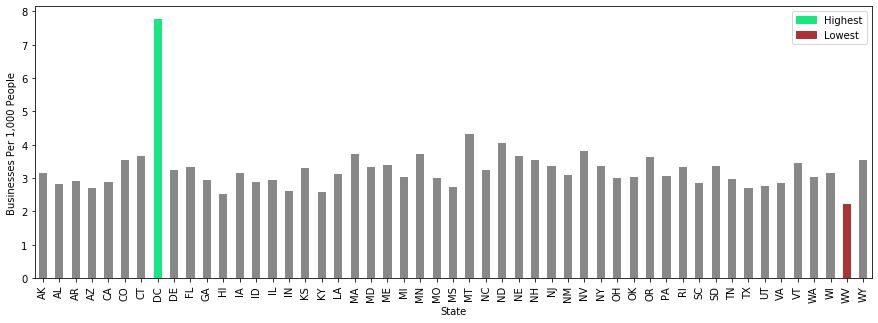

In [38]:
import matplotlib.patches as mpatches

ax = perCap.plot(kind='bar', figsize=(15, 5))

# add labels
ax.set_xlabel('State')
ax.set_ylabel('Businesses Per 1,000 People')

# make all bars grey
for bar in ax.patches:
    bar.set_facecolor('#888888')
    
# add legend
high = mpatches.Patch(color='#18e780', label='Highest')
low = mpatches.Patch(color='#aa3333', label='Lowest')
ax.legend(handles=[high, low])
# ax.legend(["HIGHEST", "LOWEST"])

# find highest businesses per capita 
highest = perCap.idxmax()
pos = perCap.index.get_loc(highest)
#highlight highest
ax.patches[pos].set_facecolor('#18e780')

# find lowest businesses per capita 
lowest = perCap.idxmin()
pos = perCap.index.get_loc(lowest)
#highlight highest
ax.patches[pos].set_facecolor('#aa3333')

# 4. 
Staying at the state level, look more carefully at the Health Care category.  What state has the most and what state has the least concentration of health-care businesses, where concentration is defined as the percentage of total businesses in the state that are in the health-care category? Show a table with the information about all states that highlights the states with the most and least concentration.

In [39]:
typeByState = validZips.groupby('state').Abbreviation.value_counts()
typeByState

state  Abbreviation 
AK     Health Care      341
       Retail           263
       Tech Services    255
       Unknown          239
       Other            188
                       ... 
WY     Education         27
       Agriculture       25
       Arts              24
       Oil&Gas           15
       Utilities          5
Name: Abbreviation, Length: 1064, dtype: int64

In [40]:
stateByType = validZips.groupby('Abbreviation').state.value_counts()
healthCare = stateByType['Health Care']
healthCare.sort_index(inplace=True)
healthCare

state
AK      341
AL     1628
AR     1120
AZ     2567
CA    15961
CO     2591
CT     2114
DC      586
DE      401
FL     8560
GA     3606
HI      545
IA     1191
ID      626
IL     5496
IN     2484
KS     1211
KY     1724
LA     1895
MA     3891
MD     2822
ME      672
MI     4669
MN     2321
MO     2475
MS     1041
MT      488
NC     3671
ND      328
NE      844
NH      595
NJ     4399
NM      844
NV      940
NY    10678
OH     5095
OK     1489
OR     1880
PA     6233
RI      610
SC     1671
SD      360
TN     2535
TX     9149
UT      993
VA     3064
VT      342
WA     3006
WI     2478
WV      707
WY      259
Name: state, dtype: int64

In [41]:
numBusinesses = validZips.state.value_counts()
numBusinesses.sort_index(inplace=True)
numBusinesses

AK      2209
AL     13437
AR      8508
AZ     17208
CA    106031
CO     17664
CT     12975
DC      4500
DE      2894
FL     61707
GA     28339
HI      3371
IA      9543
ID      4530
IL     37636
IN     16937
KS      9378
KY     11093
LA     13938
MA     23314
MD     17359
ME      4259
MI     29560
MN     18272
MO     18020
MS      7721
MT      3881
NC     25837
ND      2600
NE      6232
NH      4353
NJ     28106
NM      5587
NV      7557
NY     62401
OH     33972
OK     10452
OR     12300
PA     37453
RI      3456
SC     12960
SD      2747
TN     18682
TX     67518
UT      7562
VA     22417
VT      2149
WA     20237
WI     17788
WV      4140
WY      1979
Name: state, dtype: int64

The following is a table showing the percentage of each state's businesses that are in the healthcare category. The table is sorted high to low, so the state with the highest percentage of health care businesses is at the top (Rhode Island) and the lowest is at the bottom (Alaska). The highest value is highlighted in green but unfortunately, I could not find a way to apply multiple styles and highlight the lowest value as well.

In [42]:
def highlight_max(s):
    highlight_min(s)
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: #18e780' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

breakdown = healthCare.divide(numBusinesses) * 100
breakdown.sort_values(ascending=False, inplace=True)
breakdown.to_frame().style.apply(highlight_max)

,state
state,
RI,17.6505
NY,17.1119
WV,17.0773
MA,16.6895
PA,16.6422
CT,16.2929
MD,16.2567
HI,16.1673
VT,15.9144


# 5. 
Does the data support the claim that the state of New Hampshire has a lower concentration of health-care businesses than the country as a whole? Why or why not?


Answer:

Looking at the figure above, New Hampshire has a concentration of health-care businesses of 13.6687%. 

In [43]:
numBusinesses.unique().sum()

922769

In [44]:
healthCare.unique().sum()

134352

To get the concentration of health-care businesses in the entire country, we have to add up all the [unique] health care businesses in the country and divide it by the total businesses in the country. We then multiply the fraction by 100 to get the percentage.

In [45]:
( healthCare.sum() / numBusinesses.sum() ) * 100

14.651120703014515

From this calculation, we find that the total concentration of health care businesses in  the country is 14.65%. New Hampshire's concentration is 13.67%. This supports the conclusion that New Hampshire has a lower concentration of health care businesses.

# 6. 
Do an analysis on the quantity mean per capita income per state.  What does the distribution of this attribute look like?  Is it skewed?  Are there outliers?

Answer:

First, get the total population of each state.

In [46]:
statePops = zips.groupby('state').population.sum()
statePops

state
AK      703159
AL     4761097
AR     2912218
AZ     6356003
CA    36925462
CO     4979179
CT     3548308
DC      579471
DE      892487
FL    18593035
GA     9613781
HI     1339090
IA     3027282
ID     1566982
IL    12800032
IN     6452186
KS     2844009
KY     4312663
LA     4464564
MA     6289735
MD     5220219
ME     1255979
MI     9735496
MN     4908331
MO     5976862
MS     2824350
MT      899811
NC     7965332
ND      640141
NE     1706465
NH     1227937
NJ     8338350
NM     1805713
NV     1983474
NY    18596537
OH    11309255
OK     3436631
OR     3378525
PA    12210200
RI     1038604
SC     4556028
SD      813654
TN     6292739
TX    24939233
UT     2734420
VA     7888581
VT      623895
WA     6681919
WI     5627890
WV     1852774
WY      557031
Name: population, dtype: int64

Since we cannot average averages, we must first get the total income in a state and then divide it by the total population. Here, we are getting total income in a zip code by multiplying mean_income by population. Then add up all zip codes in a state to get the total income per state. 

In [47]:
zips['total_income'] = zips['mean_income'] * zips['population']
zips

,zip,state,mean_income,median_income,population,total_income
0,01001,MA,56663,66688,16445,931823035
1,01002,MA,49853,75063,28069,1399323857
2,01003,MA,28462,35121,8491,241670842
3,01005,MA,75423,82442,4798,361879554
4,01007,MA,79076,85802,12962,1024983112
...,...,...,...,...,...,...
32622,99923,AK,43625,42895,87,3795375
32623,99925,AK,50357,63808,819,41242383
32624,99926,AK,44063,51660,1460,64331980
32625,99927,AK,41815,55501,94,3930610


Group by state to get total income per state

In [48]:
stateIncomes = zips.groupby('state').total_income.sum()
stateIncomes

state
AK      48904193983
AL     217091872408
AR     120590512619
AZ     348598965686
CA    2424135659803
CO     309879911185
CT     268675632934
DC      36440168046
DE      55454261981
FL     964801715599
GA     518187573346
HI      92721180574
IA     156000238914
ID      76489939718
IL     778581806940
IN     330124356842
KS     155015682449
KY     192950436909
LA     206000839869
MA     439555400677
MD     395847633317
ME      60932824184
MI     493629734673
MN     295127022666
MO     301989072223
MS     108599234101
MT      41250741730
NC     374644573852
ND      30440086791
NE      85947042417
NH      81851406569
NJ     630790815239
NM      83038001220
NV     108722049853
NY    1136525019168
OH     563358923435
OK     153671411777
OR     173815877045
PA     656532597298
RI      60158569498
SC     210215338248
SD      39969914531
TN     297134240465
TX    1363599090476
UT     165083073404
VA     554836893881
VT      33630584372
WA     411465962516
WI     305857265788
WV      744263

Divide income by population to get income per capita

In [49]:
perCapIncome = stateIncomes / statePops
perCapIncome

state
AK    69549.268349
AL    45597.027830
AR    41408.477188
AZ    54845.626361
CA    65649.433440
CO    62235.141815
CT    75719.366226
DC    62885.231610
DE    62134.531910
FL    51890.491014
GA    53900.496937
HI    69241.933383
IA    51531.452608
ID    48813.540754
IL    60826.551601
IN    51164.730348
KS    54506.044970
KY    44740.439239
LA    46141.311866
MA    69884.565992
MD    75829.698585
ME    48514.206196
MI    50704.117661
MN    60127.775137
MO    50526.358518
MS    38451.053907
MT    45843.784673
NC    47034.395283
ND    47552.159276
NE    50365.546564
NH    66657.659610
NJ    75649.356916
NM    45986.267596
NV    54813.952617
NY    61114.874192
OH    49813.973019
OK    44715.714831
OR    51447.266794
PA    53769.192749
RI    57922.528219
SC    46140.045287
SD    49123.969809
TN    47218.586448
TX    54676.865583
UT    60372.244719
VA    70334.182267
VT    53904.237687
WA    61579.010837
WI    54346.702901
WV    40170.238752
WY    58062.759301
dtype: float64

We will make a vioin graph to see the distribution. The distribution below shows that the per capita income per state distribution is skewed towards the lower end. The distribution is clustered around the \\$50,000 mark. The incomes vary from about \\$30,000 and \\$85,000. The median appears to be around \\$52,000. 

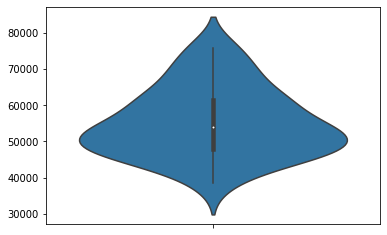

In [50]:
import seaborn as sns
sns.violinplot(perCapIncome ,orient="v")

To see any outliers, we will do a box and whisker chart. From the box chart below, there are no outliers for mean per capita income by state.

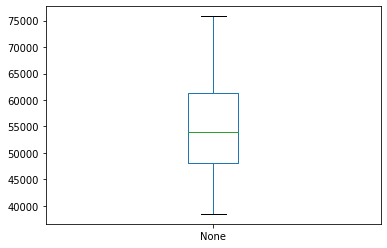

In [51]:
perCapIncome.plot(kind='box')